In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("vigruzka.xlsx")

In [3]:
df = df.drop(columns = ["Unnamed: 8", "Unnamed: 9"], axis = 1)

In [4]:
df.columns = ["id", "doc_number", "date", "date_ish", "adresat", "description", "author", "author_company"]

In [5]:
df = df.drop(columns = ["id", "doc_number", "date_ish"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4965 non-null   datetime64[ns]
 1   adresat         4967 non-null   object        
 2   description     4967 non-null   object        
 3   author          4967 non-null   object        
 4   author_company  4966 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 194.1+ KB


In [7]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [8]:
df

,date,adresat,description,author,author_company,year,month,day
0,2019-04-09,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»),2019.0,4.0,9.0
1,2019-04-09,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации),2019.0,4.0,9.0
2,2019-04-09,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области),2019.0,4.0,9.0
3,2019-04-09,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации),2019.0,4.0,9.0
4,2019-04-09,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...,2019.0,4.0,9.0
...,...,...,...,...,...,...,...,...
4962,2017-11-01,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,Медведев Д.А.,Аппарат Правительства Российской Федерации),2017.0,11.0,1.0
4963,2017-11-01,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,2017.0,11.0,1.0
4964,2017-11-01,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...,2017.0,11.0,1.0
4965,2017-11-01,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...,2017.0,11.0,1.0


In [9]:

df["year"] = df["year"].fillna(df["year"].median())
df["month"] = df["month"].fillna(df["month"].median())
df["day"] = df["day"].fillna(df["day"].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4965 non-null   datetime64[ns]
 1   adresat         4967 non-null   object        
 2   description     4967 non-null   object        
 3   author          4967 non-null   object        
 4   author_company  4966 non-null   object        
 5   year            4967 non-null   float64       
 6   month           4967 non-null   float64       
 7   day             4967 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 310.6+ KB


In [11]:
#df = df.drop("date", axis = 1)
df = df.dropna()

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alyos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_data(df):
    df = df.str.lower()
    df = df.replace(r'[^а-яА-Яa-zA-Z]', ' ', regex = True)
    df = df.str.strip()
    stop_words = stopwords.words("russian")
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

In [14]:
df["description"] = clean_data(df["description"])
df["author_company"] = clean_data(df["author_company"])

In [15]:
df["adresat"] = df["adresat"].str.lower()
df["author"] = df["author"].str.lower()

## Сохранение данных 

In [16]:
df.to_csv("final_csv.csv", sep = "\t", encoding="utf-16", index = False)

## Формирование словарей данных

In [17]:
df_main = pd.DataFrame()
df_main["adresat"], df_main["description"] = df["adresat"], df["description"]
df_main.head()

,adresat,description
0,уразов р.н.,вх возможности использования сетевого издания ...
1,уразов р.н.,вх участии совещании вопросу доработки фэо пре...
2,уразов р.н.,вх командировании саликовой глушко д участия з...
3,иванюк л.а.,вх участии чемпионате мира профессиональному м...
4,уразов р.н.,вх участии церемонии открытия вузовского чемпи...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import csv


stop_words_b = stopwords.words("russian")

cvzer = CountVectorizer(stop_words=stop_words_b)

cvzer.fit(df_main["description"])

vect_dict = cvzer.fit_transform(df_main["description"]).toarray()

my_dict = cvzer.vocabulary_

In [19]:
with open("dictwordfiles.csv", "w", encoding="utf-16") as file:
    w = csv.DictWriter(file, my_dict.keys())
    w.writeheader()
    w.writerow(my_dict)

In [20]:
df_dict = pd.read_csv("dictwordfiles.csv", encoding = "utf-16")

## Визуализация данных

### Word Cloud

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

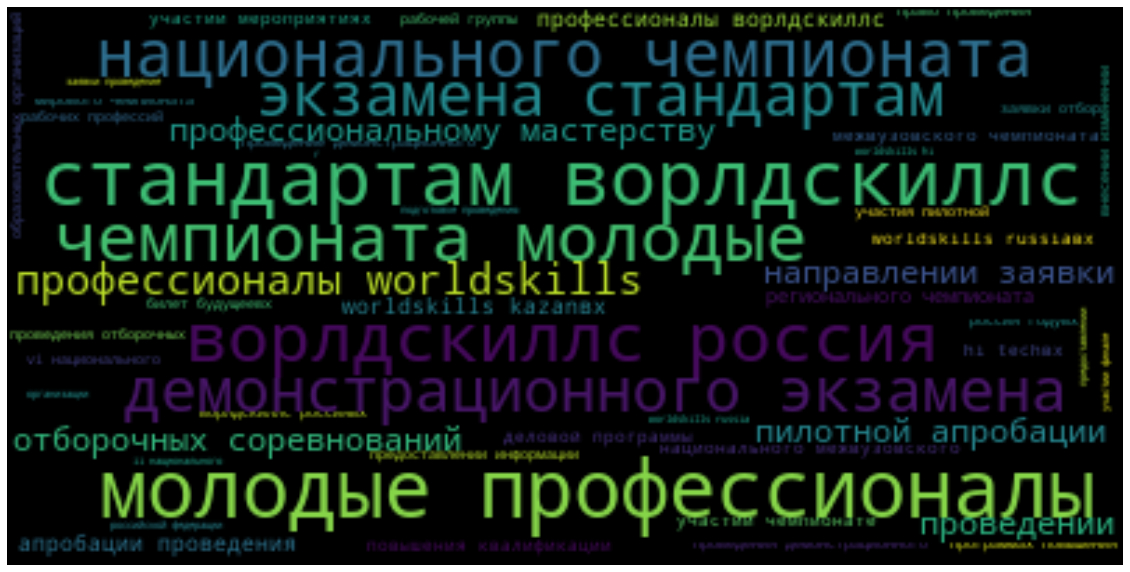

In [22]:
text = df["description"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

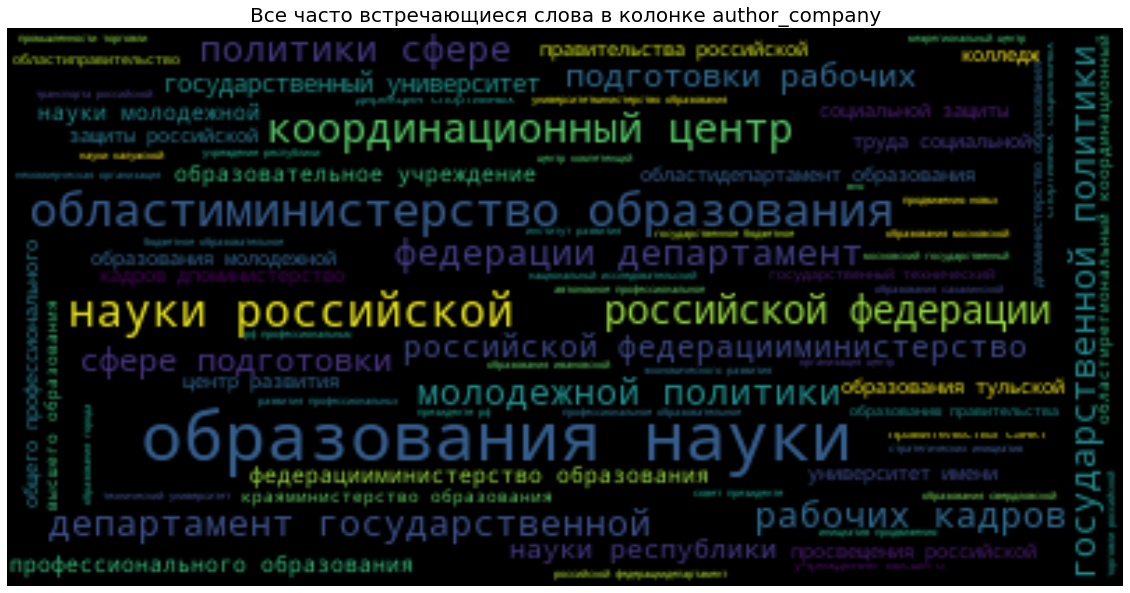

In [23]:
text = df["author_company"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Все часто встречающиеся слова в колонке author_company", fontsize = 20)
plt.show()

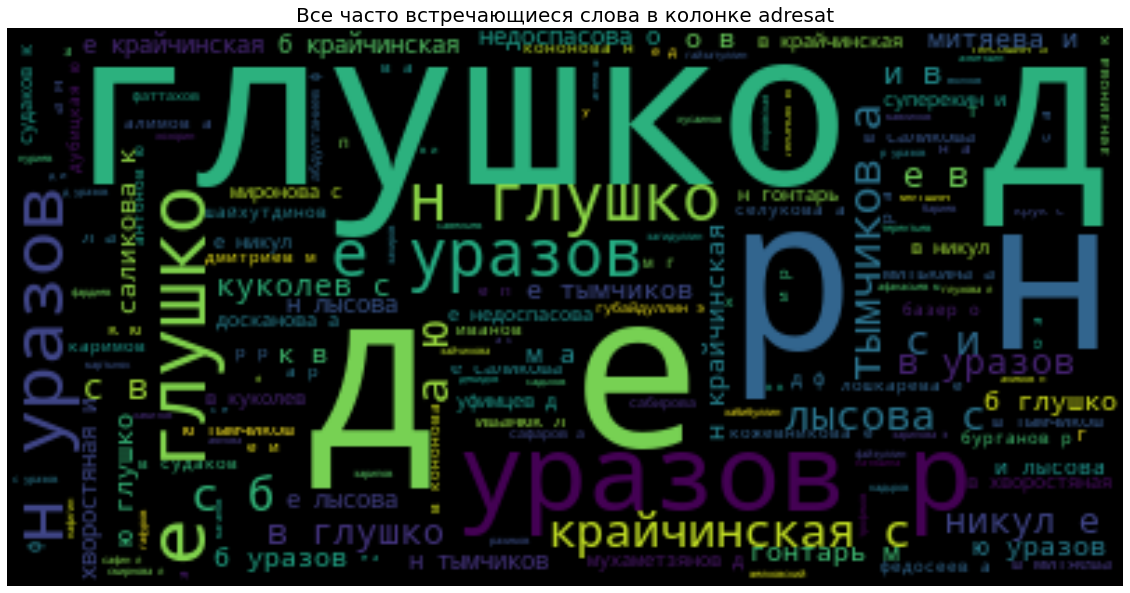

In [24]:
text = df["adresat"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Все часто встречающиеся слова в колонке adresat", fontsize = 20)
plt.show()

## Plot

Визуализация временных рядов



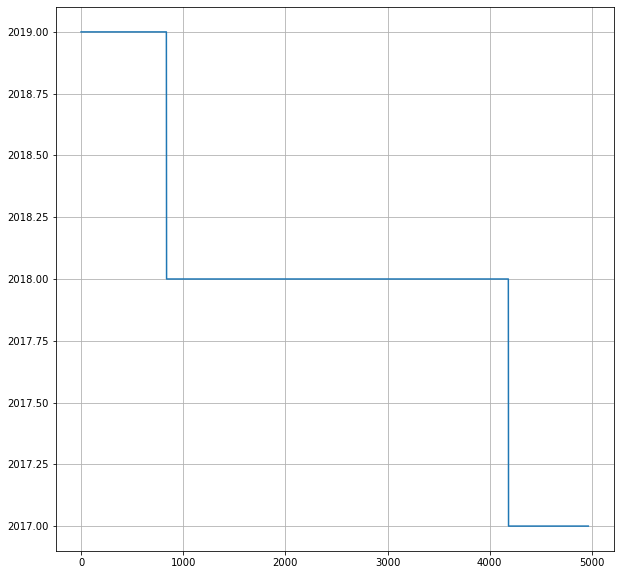

In [25]:
df["year"].plot(figsize = (10, 10), grid = "on")

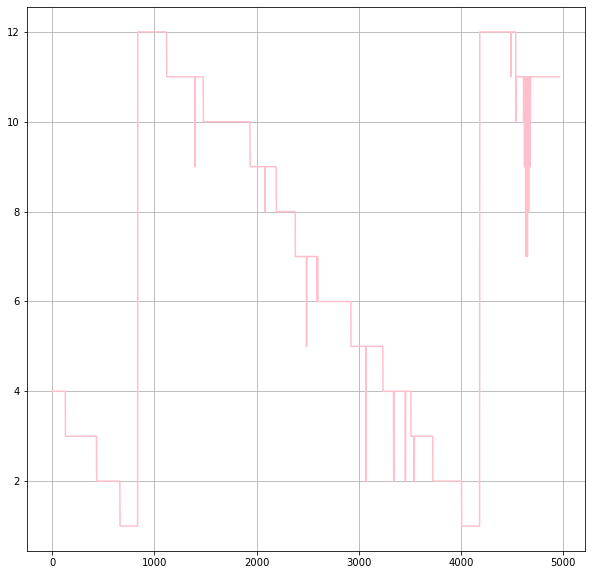

In [26]:
df["month"].plot(figsize = (10, 10), grid = "on", color = "pink")

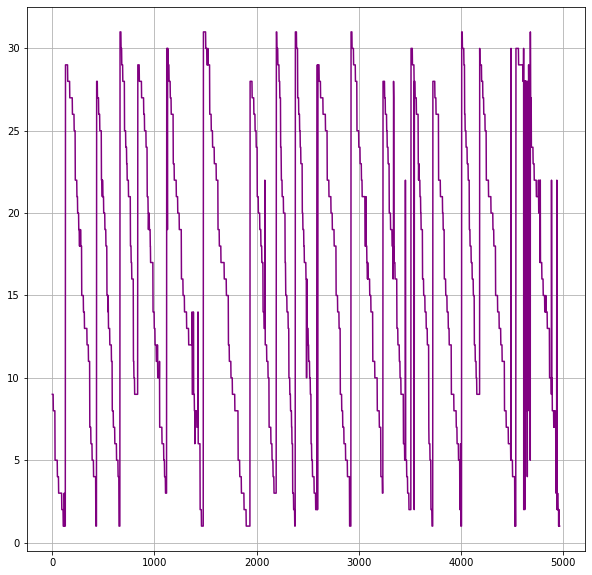

In [27]:
df["day"].plot(figsize = (10, 10), grid = "on", color = "purple")

# Модуль 2. Классификация документов

- SGD Classifier - уместна при классификации текста
- Naive Bayes - также хорошо подходит для классификации текста
- SVC - линейная классификация

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [29]:
x = vect_dict
y = df["adresat"].values

Разбиваем выборку по схеме 10% к 90%, так как объём имеющихся данных небольшой

## Обучение

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 500)
pca_feat_x = pca.fit_transform(vect_dict)

In [31]:
x = pca_feat_x
y = df["adresat"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.1)

### SGD 

In [32]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
print(sgd.score(x_test, y_test))

0.6841046277665996


In [33]:
print(classification_report(y_test, sgd.predict(x_test)))

                                                         precision    recall  f1-score   support

                                          абдуллин а.м.       0.00      0.00      0.00         1
                                            алимов а.а.       0.00      0.00      0.00         1
                                           антонов ю.в.       1.00      1.00      1.00         2
                                            глушко д.е.       0.77      0.84      0.81       150
                                 глушко д.е.
базер о.э.       0.00      0.00      0.00         1
                                глушко д.е.
лысова с.и.       0.00      0.00      0.00         0
                           глушко д.е.
недоспасова о.в.       0.00      0.00      0.00         0
                                 глушко д.е.
никул е.в.       0.00      0.00      0.00         1
                              глушко д.е.
саликова к.в.       0.00      0.00      0.00         1
                             

### SVC

In [34]:
svc = SVC()
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

0.6981891348088531


In [35]:
print(classification_report(y_test, svc.predict(x_test)))

                                          precision    recall  f1-score   support

                           абдуллин а.м.       0.00      0.00      0.00         1
                             алимов а.а.       0.00      0.00      0.00         1
                            антонов ю.в.       1.00      1.00      1.00         2
                             глушко д.е.       0.74      0.88      0.80       150
                  глушко д.е.
базер о.э.       0.00      0.00      0.00         1
                  глушко д.е.
никул е.в.       0.00      0.00      0.00         1
               глушко д.е.
саликова к.в.       0.00      0.00      0.00         1
               глушко д.е.
тымчиков а.ю.       0.00      0.00      0.00         1
                            гонтарь м.а.       0.89      0.67      0.76        12
                           дмитриев м.г.       0.00      0.00      0.00         2
                          досканова а.в.       0.00      0.00      0.00         2
досканова а.в.


### NB

In [36]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)
print(nbc.score(x_test, y_test))

0.4788732394366197


In [37]:
print(classification_report(y_test, nbc.predict(x_test)))

                                                         precision    recall  f1-score   support

                                          абдуллин а.м.       0.00      0.00      0.00         1
                                            алимов а.а.       0.00      0.00      0.00         1
                                           антонов ю.в.       0.00      0.00      0.00         2
                                          артемова т.в.       0.00      0.00      0.00         0
                                            глушко д.е.       0.59      0.53      0.55       150
                                 глушко д.е.
базер о.э.       0.00      0.00      0.00         1
                              глушко д.е.
митькина а.н.       0.00      0.00      0.00         0
                                 глушко д.е.
никул е.в.       0.00      0.00      0.00         1
                              глушко д.е.
саликова к.в.       0.00      0.00      0.00         1
                             

## Feature Engineering

Идея заключается в том, чтобы привести классификацию к классу важности и сделать ее бинарной:

- Для этого создадим функцию, которая будет кодировать наиболее важных представителей WS к `классу 1`, остальных к `классу 0`. (В нашем случае это предствители будут - `уразов р.н.` и `глушко д.е.`, т.к их имена встречаются очень часто)
- Провести обучение на новой целевой переменной `class_v`

In [38]:
def class_v(x):
    if x == str("уразов р.н.") or x == str("глушко д.е."):
        return 1
    else:
        return 0

In [39]:
df["class_v"] = df["adresat"].apply(lambda x: class_v(x))

In [40]:
df["class_v"].value_counts()

1    3023
0    1941
Name: class_v, dtype: int64

In [41]:
x = pca_feat_x
y = df["class_v"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.1)

### SVC

In [52]:
svc = SVC()
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

0.8410462776659959


In [45]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       207
           1       0.84      0.90      0.87       290

    accuracy                           0.84       497
   macro avg       0.84      0.83      0.83       497
weighted avg       0.84      0.84      0.84       497



### SGD

In [51]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
print(sgd.score(x_test, y_test))

0.8128772635814889


In [47]:
print(classification_report(y_test, sgd.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       207
           1       0.84      0.86      0.85       290

    accuracy                           0.82       497
   macro avg       0.82      0.82      0.82       497
weighted avg       0.82      0.82      0.82       497



### NB

In [50]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)
print(nbc.score(x_test, y_test))

0.6096579476861167


In [49]:
print(classification_report(y_test, nbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.52      0.74      0.61       207
           1       0.74      0.52      0.61       290

    accuracy                           0.61       497
   macro avg       0.63      0.63      0.61       497
weighted avg       0.65      0.61      0.61       497

